# Introdução

Essa análise busca identificar o perfil dos clientes que dão churn em um Banco. 

### Colunas
1. customer_id.
2. credit_score.
3. country.
4. gender.
5. age.
6. tenure.
7. balance.
8. products_number.
9. credit_card.
10. active_member.
11. estimated_salary.
12. churn.

**Link do Dataset:** 

# Carregar Libs

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Carregando Dataset

In [6]:
churn = pd.read_csv("Bank Customer Churn Prediction.csv")
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
"""
    Podemos ver a quantidade de valores de cada coluna.
    As colunas que tem 2 tipos de valores quase, em 99.9% dos casos são de Sim ou Não.
"""

churn.nunique().sort_values()

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

In [14]:
# quais países que a gente atua
countries = churn['country'].unique()
print(f'Nosso Dataset atua em {countries}')

Nosso Dataset atua em ['France' 'Spain' 'Germany']


In [15]:
churn[['age', 'credit_score', 'balance', 'estimated_salary']].describe()

,age,credit_score,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,76485.889288,100090.239881
std,10.487806,96.653299,62397.405202,57510.492818
min,18.000000,350.000000,0.000000,11.580000
25%,32.000000,584.000000,0.000000,51002.110000
50%,37.000000,652.000000,97198.540000,100193.915000
75%,44.000000,718.000000,127644.240000,149388.247500
max,92.000000,850.000000,250898.090000,199992.480000


In [29]:
# investigando clientes que não tem dinheiro em conta
# churn.loc[churn['balance'] == 0]
churn_balance_zero = churn.query('balance == 0').copy()
churn_balance_zero.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0


In [32]:
# Pessoas com maiores balances (dinheiro em conta)

index_largest_balance = churn['balance'].nlargest(10).index
churn.iloc[index_largest_balance]


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,15571958,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,15586674,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
1067,15599131,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
138,15594408,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
1533,15769818,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,15620268,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,15780212,592,France,Male,37,4,212692.97,1,0,0,176395.02,0


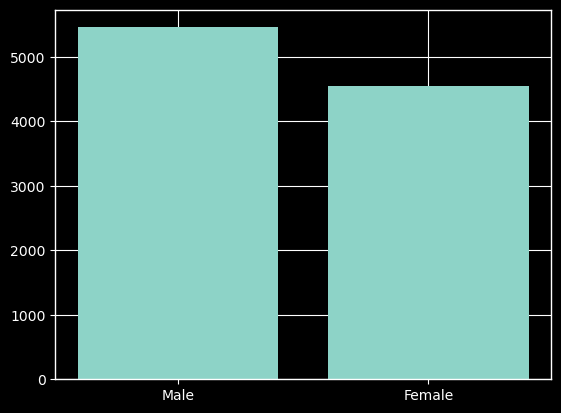

In [44]:
# distribuição de genero 

fig, ax = plt.subplots()

x = churn['gender'].value_counts().index
y = churn['gender'].value_counts().values

_ = ax.bar(x, y)